In [1]:
#!conda install -y numpy
#!conda install -y matplotlib
!pip3 install numpy
!pip3 install matplotlib
!pip3 install torchvision

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
     |████████████████████████████████| 10.3 MB 80.1 MB/s eta 0:00:01B 80.1 MB/s eta 0:00:01███████▊| 10.2 MB 80.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 5.6 MB/s eta 0:00:01
Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
     |████████████████████████████████| 17.4 MB 3.0 MB/s eta 0:00:01 eta 0:00:06��        | 12.8 MB 3.0 MB/s eta 0:00:02��███▌    | 14.9 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 804.1 MB 119.5 MB/s 


In [3]:
import torchvision
import torch
from torchvision import transforms
import torchvision.models as models
import matplotlib.pyplot as plt
import torch.nn as nn

batchsz = 32
lr = 1e-3
epochs = 10
#device = torch.device('cuda')
torch.manual_seed(1234)   #为了方便以后能复现同样结果
#viz = visdom.Visdom()

densenet = models.DenseNet()
densenet.fc = nn.Linear(1024, 3)
print(densenet)

train_data_path = "./3classes/train/"
eval_data_path = "./3classes/validation/"

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

/home/ma-user/anaconda3/envs/Pytorch-1.0.0/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [4]:
import numpy as np
from torchvision import transforms

transforms = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

In [15]:
train_data = torchvision.datasets.ImageFolder(root=train_data_path, transform=transforms)
eval_data = torchvision.datasets.ImageFolder(root=eval_data_path, transform=transforms)

In [16]:
EPOCH = 20               # train the training data n times, to save time, we just train 1 epoch
LR = 0.001 
batch_size = 16
train_loader=torch.utils.data.DataLoader(train_data,batch_size=batch_size)
eval_loader=torch.utils.data.DataLoader(eval_data,batch_size=batch_size)

In [17]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(device)


cuda


In [18]:
#!pip3 install tensorboard

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

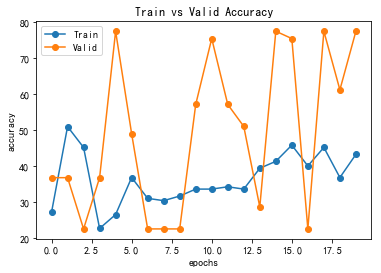

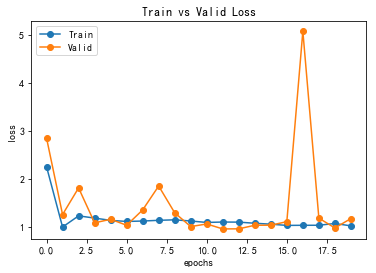

In [19]:
import torch.nn as nn

cnn = densenet
print(cnn)  # net architecture

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

def fit(model, train_loader, optimizer, loss_func):
    print('Training')
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    total = 0
    
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        optimizer.zero_grad()           # clear gradients for this training step
        b_x, b_y = b_x.to(device), b_y.to(device)
        model = model.to(device)
        output = model(b_x)               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        #train_running_loss += loss.item()
        _, predicted = output.max(1)
        total += b_y.size(0)
        train_running_correct += predicted.eq(b_y).sum().item()
        
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients
        
        train_running_loss += loss.item()
     
    train_loss = train_running_loss / len(train_loader)
    train_accuracy = 100. * train_running_correct / total
    return train_loss, train_accuracy

def evalidate(model, eval_loader, optimizer, loss_func):
    print('Testing')
    model.eval()
    eval_running_loss = 0.0
    eval_running_correct = 0
    total = 0
    
    #不需要计算梯度，所以加上不求导，验证集一定要加上这几句话
    with torch.no_grad():
        for step, (b_x, b_y) in enumerate(eval_loader):   # gives batch data, normalize x when iterate train_loader
            b_x, b_y = b_x.to(device), b_y.to(device)
            model = model.to(device)
            output = model(b_x)               # cnn output
            loss = loss_func(output, b_y)   # cross entropy loss
            eval_running_loss += loss.item()
            
            _, predicted = output.max(1)
            total += b_y.size(0)
            eval_running_correct += predicted.eq(b_y).sum().item()

        eval_loss = eval_running_loss / len(eval_loader)
        eval_accuracy = 100. * eval_running_correct / total
        return eval_loss, eval_accuracy
    
train_loss, train_accuracy = [], []
eval_loss, eval_accuracy = [], []

# training and testing
for epoch in range(EPOCH):
    #print(f"Epoch {epoch+1} of {EPOCH}")
    train_epoch_loss, train_epoch_accuracy = fit(
        cnn, train_loader, optimizer, loss_func
    )
    
    eval_epoch_loss, eval_epoch_accuracy = evalidate(
        cnn, eval_loader, optimizer, loss_func
    )

    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    
    eval_loss.append(eval_epoch_loss)
    eval_accuracy.append(eval_epoch_accuracy)
    
    
    print('Train Loss: %.3f | Accuracy: %.3f'%(train_epoch_loss,train_epoch_accuracy))
    print('Eval Loss: %.3f | Accuracy: %.3f'%(eval_epoch_loss,eval_epoch_accuracy))

plt.plot(train_accuracy,'-o')
plt.plot(eval_accuracy,'-o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Valid'])
plt.title('Train vs Valid Accuracy')
plt.show()

plt.plot(train_loss,'-o')
plt.plot(eval_loss,'-o')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Valid'])
plt.title('Train vs Valid Loss')
plt.show()

In [39]:
#cnn.eval()

from PIL import Image

img = Image.open('./test/cat/1.jpg')
img = transforms(img)
img = img.unsqueeze(0)

prediction = cnn(img)
prediction = prediction.argmax()
print(prediction)

tensor(1)


In [38]:
from PIL import Image

labels = ['dog','cat']
img = Image.open('./test/10.jpg')
img = transforms(img)
img = img.unsqueeze(0)
img = img.to(device)
prediction = model(img)
prediction = prediction.argmax()

print(labels[prediction])

dog
